# U.S. Medical Insurance Costs


### important libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### The dataset containts the following columns:
 
 * Patient Age
 * Patient Sex
 * Patient bmi (body-mass-index)
 * Patient children (how many children the patient has if any)
 * Patient smoker (If the patient is a smoker)
 * Patient region (region of U.S)
 * Patient charges (The insurance-charges that the patient pays)
 
 

##### Make a class called Patients()
##### which contains all the functions used to analyze the dataset


In [2]:
class Patients():
    def __init__(self,csv_file,smokers=0):
        self.df = pd.read_csv(csv_file)
        self.size = len(self.df)
        self.smokers = smokers
    
    #Average age of patients 
    # Frequency graph
    def analyze_age(self):
      
        _,bins,_ = plt.hist(self.df.age,bins = 10, edgecolor='black')
        plt.xlabel('age')
        plt.ylabel('frequency')
        plt.show()
         
        # or mean of ages
        avg_age = sum(self.df.age)/self.size
        print("Average age of patients: {}".format(round(avg_age,2)))
        
        std = self.std(self.df.age,avg_age)
        print("Standart deviation:",round(std,2))
        
        median = self.median(self.df.age)
        print("The median for ages is: {}".format(median))
        
        
        
        
    #Calculate median
    def median(self,data):
        if self.size % 2 == 0:
            median = data[self.size//2]
        else:
            median = (data[np.floor(self.size/2)] + data[np.ceil(self.size/2)])/2
        return median
    
    #Calculate std
    def std(self,data,avg):
        variance = 0
        std = 0
        sum_dif = 0
        for value in data:
            sum_dif += (value-avg)**2
        variance = sum_dif/self.size
        std = np.sqrt(variance)
        return std
    
    #Analyze sexes number of male and female patients 
    def analyze_sexes(self):
        men = 0
        women = 0
        for sex in self.df.sex:
            if sex == 'male':
                men += 1
            else:
                women += 1
                
        print("There are a total of {} men patients and a total of {} women.".format(men,women))
        
        percentages = [(men/self.size)*100, (women/self.size)*100]
        
        #print("{}% of patients are men and {}% are women.".format(percentages[0],percentages[1]))
        labels = ['male','female']
        
        #plot in a pie chart 
        self.pie_chart(percentages,labels)
        
        
        
        
    
    def pie_chart(self,values,labels):
        fig1, ax1 = plt.subplots()
        ax1.pie(values, explode=(0,0), labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        plt.show()
        
        
        
        
    def smokers_percentage(self):
        
        smoking = 0
        not_smoking = 0
        for smoker in self.df.smoker:
            if smoker == 'yes':
                smoking += 1
            else:
                not_smoking += 1

        #calculate precentage of smokers and non-smokers
        percentage = [(smoking/self.size) * 100, (not_smoking/self.size) * 100]
        
        print("A total of {} patients are smokers and {} are not.".format(smoking,not_smoking))

        #get values and labels for pie chart plot
        self.smokers = smoking

        label = ['smokers','non-smokers']

        self.pie_chart(percentage,label)

        
        
    
    def analyze_regions(self):
        unique = []
        for region in self.df.region:
            if region not in unique:
                unique.append(region)
        #print(unique)
        
        number_of_rows = []
        for region in unique:
            number_of_rows.append(len(self.df.loc[self.df['region'] == region]))
        #print(number_of_rows)
        region_population = list(zip(unique,number_of_rows))
        # regions and number of patients from each region
        sns.catplot(x="region", kind="count", palette="Set2", data=self.df)
    
    
    def analyze_bmi(self):
        total_bmi = 0
        for bmi in self.df.bmi:
            total_bmi += bmi
        avg_bmi = total_bmi/self.size
        print('Average bmi of patients: ',round(avg_bmi,2))
        
        
    def bmi_and_smoking(self):
        sns.scatterplot(x='smoker', y='bmi',hue='smoker', data=self.df)
        
    #bmi and sexes   
    def bmi_to_sex(self):
        sns.barplot(x='sex', y='bmi', data=self.df)
        
        
    #age to bmi    
    def bmi_to_age(self):
        sns.barplot(x='age', y='bmi', data=self.df)
    
    def analyze_insurance(self):
        total_charges = 0
        for charges in self.df.charges:
            total_charges += charges
        avg_charges = total_charges/self.size
        print("Average charges of patients: ",round(avg_charges,2))
        
        #charges based on sex is there a major difference ?
        
        #sns.barplot(x='sex', y='charges', data=self.df)
        #charges for smokers and non smokers
        
        sns.barplot(x='smoker', y='charges', data=self.df)
        
        #charges and bmi
        
        #
    def charges_and_bmi(self):
        sns.scatterplot(x='bmi', y='charges', data=self.df)
        
    def analyze_parents(self):
        avg_parent_age = 0
        parents = self.df.loc[self.df['children'] >= 1]
        #print(len(parents))
        #print(parents['age'])
        avg_parent_age = sum(parents['age'])/len(parents)
        print("Average age of patients with at least 1 child: ",avg_parent_age)
        #frequency plot of parents
        sns.countplot(x='children',data=self.df)
        
        #charges of insurance against how many children the patients have
        
        #
    def parents_and_charges(self):
        sns.barplot(x='children', y='charges',hue='children', data=self.df)
        plt.legend(loc='center', title='children')
        
    def parents_who_smoke(self):
        parents = self.df.loc[self.df['children'] >= 1]
        parents_smoke = parents.loc[parents['smoker'] == 'yes']
        
        print("A total of {} parents smoke out of a {} smokers in the dataset.\n".format(len(parents_smoke),self.smokers))
        single = sum(x for x in parents_smoke['children'] if x == 1)
        double = sum(x for x in parents_smoke['children'] if x == 2)
        triple = sum(x for x in parents_smoke['children'] if x == 3)
        other = abs(self.smokers - (single + double + triple))
        
        print("{} parents with 1 child that smoke.\n".format(single))
        print("{} parents with 2 children that smoke.\n".format(double))
        print("{} parents with 3 children that smoke.\n".format(triple))
        print("{} parents with >=4 children that smoke.\n".format(other))
        
        
        
        values = [single,double,triple,other]
        labels = ['1 child','2 children','3 children','4 or more children']
        sns.barplot(x = labels, y = values, hue = labels)
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)  
        
        
        
        
    
csv_file = 'insurance.csv'
patient = Patients(csv_file)    


##### We make an instance of the class Patients and call the methods for analysis.

##### Let's calculate the average age of patients in the dataset. We also print the median  and standart deviation of the age column
##### We also have the frequency plot 

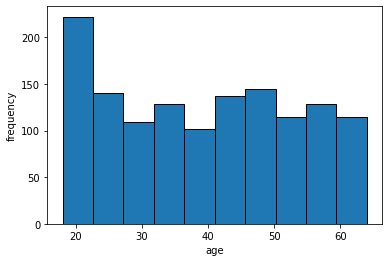

Average age of patients: 39.21
Standart deviation: 14.04
The median for ages is: 40


In [3]:
patient.analyze_age()


##### The next step of the analysis is to check the balance of males vs females in the dataset.
##### We can use a pie chart to visualize the percentages of male vs female     

There are a total of 676 men patients and a total of 662 women.


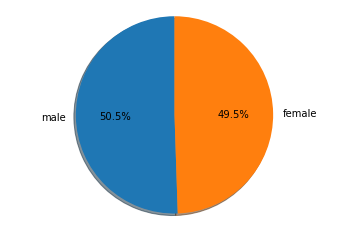

In [4]:
patient.analyze_sexes()

##### Next we will analyze the percentage of smokers to non smokers in the database.
##### We use a pie chart to visualize this as well, where orange = non smokers , blue = smokers

A total of 274 patients are smokers and 1064 are not.


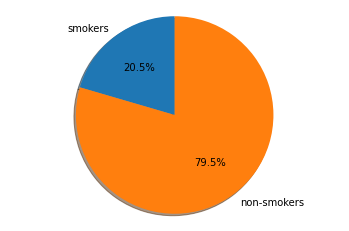

In [5]:
patient.smokers_percentage()

##### Next we will see how many unique regions are in the dataset, as well as how balanced the representation of each region is (meaning how many patients are from each region of the U.S)

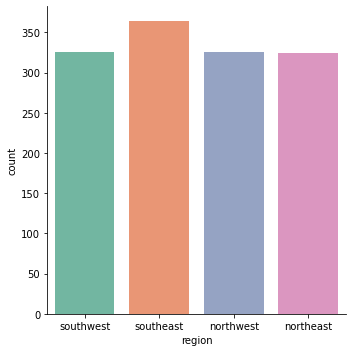

In [6]:
patient.analyze_regions()

Average bmi of patients:  30.66


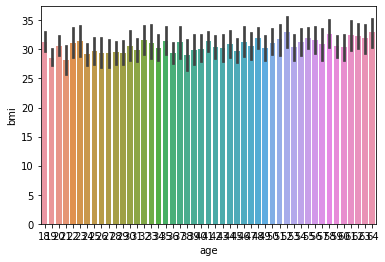

In [7]:
patient.analyze_bmi()
patient.bmi_to_age()

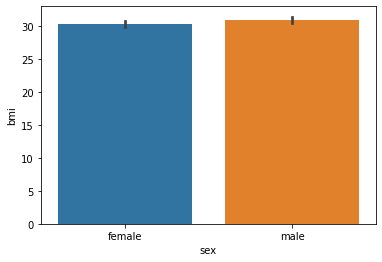

In [8]:
patient.bmi_to_sex()

##### Next we will analyze the insurance charges. We calculate the average charges of all patients.
##### We also check if there is a relation between smokers and high charges and vice-versa

Average charges of patients:  13270.42


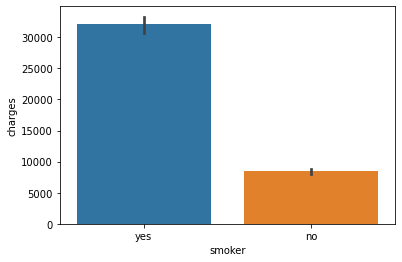

In [9]:
patient.analyze_insurance()

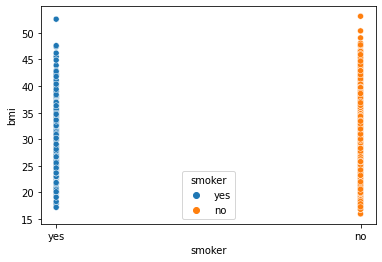

In [10]:
patient.bmi_and_smoking()

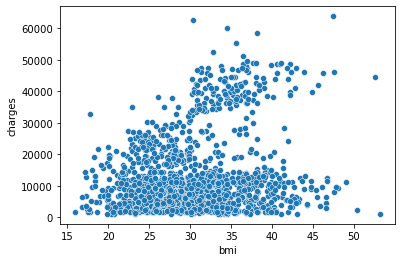

In [11]:
patient.charges_and_bmi()

##### Next we will analyze the average age of parents of the dataset meaning patients with children >= 1. Also barplot of frequency to children.


Average age of patients with at least 1 child:  39.78010471204188


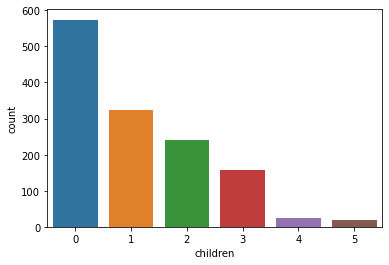

In [12]:
patient.analyze_parents()

#### We can see that almost half of the patients are parents

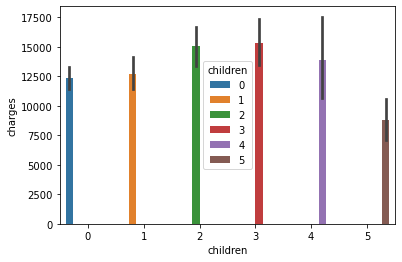

In [13]:
patient.parents_and_charges()

##### We can see that parents with (2-3) children pay the most insurance. Although we have seen that there is a correlation to smoking and high insurance so maybe most of the smokers have 2-3 children so that spikes the charges as well ? we will have to see


A total of 159 parents smoke out of a 274 smokers in the dataset.

61 parents with 1 child that smoke.

110 parents with 2 children that smoke.

117 parents with 3 children that smoke.

14 parents with >=4 children that smoke.



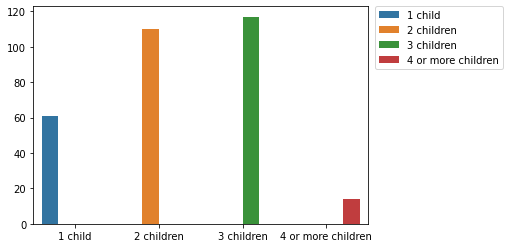

In [14]:
patient.parents_who_smoke()

##### From this analysis we can see that most of the smokers in the dataset have 2 to 3 children. And most of the parents with 2-3 children have the highest insurance charges.
##### These seem to be related but it might be a coincidence if it's not it would strengthen the assumption that smoking means -> higher insurance charges